## **NN_Naive_ALLBatch_Refactored.ipynb**

Our artificial neural network here would work great for classifying data into multiple (10) classes. 

Here we use Softmax. Given a specific example Softmax will output probabilities (probabilities of that example being each class) where all of them add up to 1. Note that here we are assuming that each example belongs to exactly one class and can't have multiple labels (e.g. Dog and Frog in this case wouldn't make sense but for classifying the genre of different Netflix movies you may have one movie that is Action, Sci-Fi, and comedy). We would also have to use a different function other than softmax and different approach.

Although our images are fairly complicated. This might have been fine for numerical data and classifying that or simple images e.g. black and white letters or something.

* Here this is going to require too much computation 
* It also is at risk of overfitting if there is too much variation and we can see that some of these cats for example, are in different positions and parts of the image and our network will struggle with this
* As we are feeding in data flattened (each image is just an array of numeric values 1x 3072 vector) it literally treats all of the parts of the image the same and data which is close together (in 2D maybe they are together) the same as far apart data 

Our images in 2D would be 32 x 32 x 3 size. 32 by 32 for dimensions height and width and the 3 for the colour depth (rgb, red green blue values like 120, -63, 24). 

Flattened each image is 1 x 3072. 

In the dataset folder "cifar-10-batches-py":
there are data batch 1 to 5 and a test batch

* data batch 1 to 5 are used for training and in total therefore there are 50000 images used for training
* test batch has 10000 image

Each batch has 10000 images so e.g. data batch 1 for training has 10000 images

As a flattened image is 1 x 3072 vector the whole data matrix for data batch 1 (used for training) is (10000, 3072)
We train this network on all 5 batches. Each batch it sees 10 times (thats why its 10 epochs and it starts at like low accuracy and works its way up). Then we test the network on the 1 testing batch using this unseen data to see if it can actually "see" and classify images correctly.

We get a low training accuracy and testing accuracy so we must change our approach.

## NN Convolutional Neural Network

This is better suited so we get higher accuracy on this complex image dataset than the flawed naive network.

In [1]:
import File_Manager_Tar_Gz as fm

In [2]:
def download_and_extract_data():
    file_name = "cifar-10-python.tar.gz"
    website_link = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

    print(fm.download_file_tar_gz(dataset_link=website_link, dataset_file_name=file_name))
    print(fm.open_file_tar_gz(file_name))

In [3]:
download_and_extract_data()

Error: File already downloaded as file cifar-10-python.tar.gz/
False
Error: File already extracted as folder cifar-10-batches-py/
False


In [4]:
def load_data(file_names : list, folder_names : list):
    data_dico = {}
    for fil, fold in zip(file_names, folder_names):
        batch_file_path = "{}/{}".format(fold, fil)
        dico = fm.unpickle(batch_file_path)
        data_dico[dico[b'batch_label']] = dico

    return data_dico

In [5]:
file_names = ["data_batch_1", "data_batch_2", "data_batch_3", "data_batch_4", "data_batch_5", "test_batch"]
data = load_data(file_names, ["cifar-10-batches-py"]*len(file_names))

In [6]:
# From cifar-10 https://www.cs.toronto.edu/~kriz/cifar.html our 10 classes
label_classes = ["airplane", "automobile", "bird", "cat",	"deer",	"dog", "frog", "horse", "ship", "truck"]

In [7]:
# data.keys() 
# >>> dict_keys([b'training batch 1 of 5', b'training batch 2 of 5', b'training batch 3 of 5', b'training batch 4 of 5', b'training batch 5 of 5', b'testing batch 1 of 1'])

# data[b'training batch 1 of 5'] # >>>> png names.....

# data[b'training batch 1 of 5'].keys() 
# >>> dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

# batch 1 training data and labels
# print(data[b'training batch 1 of 5'][b'data'].shape)     # >>> (10000, 3072)     
# print(len(data[b'training batch 1 of 5'][b'labels']))    # >>> 10000

'''
(10000, 3072)
10000 labels as it is batch 1 of 5 ie 10000 out of 50000 images
32 x 32 pixels image # 3 colour depth 32323 = 3072


print("Training set min: {}, max: {}".format(b1_dico[b'data'].min(), b1_dico[b'data'].max())) # Training set min: 0, max: 255
print("Labels min: {}, max: {}".format(min(b1_dico[b'labels']), max(b1_dico[b'labels']))) # Labels min: 0, max: 9
'''

'\n(10000, 3072)\n10000 labels as it is batch 1 of 5 ie 10000 out of 50000 images\n32 x 32 pixels image # 3 colour depth 32323 = 3072\n\n\nprint("Training set min: {}, max: {}".format(b1_dico[b\'data\'].min(), b1_dico[b\'data\'].max())) # Training set min: 0, max: 255\nprint("Labels min: {}, max: {}".format(min(b1_dico[b\'labels\']), max(b1_dico[b\'labels\']))) # Labels min: 0, max: 9\n'

In [8]:
def normalise_data(data_dico):
    """ Normalise this data between 0 and 1 to make it easier for plotting.
    
    Changes data dictionary
    """

    for key in data_dico.keys(): # training batch 1 to 5 and testing batch
        data_dico[key][b'data'] = data_dico[key][b'data'] / data_dico[key][b'data'].max()
    return data_dico

In [9]:
data = normalise_data(data)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

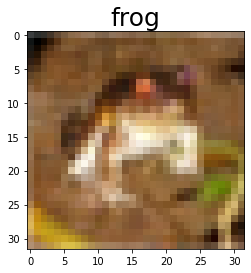

In [11]:
def image_viewer(data_dico, batch_name, index):
    plt.imshow(np.reshape(data_dico[batch_name][b'data'][index],(3, 32,32)).transpose([1,2,0]))
    plt.title(label_classes[data_dico[batch_name][b'labels'][index]], size=25)
    plt.show()

# First Training image in batch 1
image_viewer(data, b'training batch 1 of 5', 0)

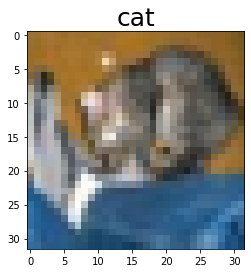

In [12]:
# First Testing image in testing batch
image_viewer(data, b'testing batch 1 of 1', 0)

In [13]:
import tensorflow as tf

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3072,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(label_classes), activation=tf.nn.softmax) # len(label_classes) is 10
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
'''
for k in data.keys():
    if k != b'testing batch 1 of 1':
        # k is batch name
        x = data[k][b'data']
        y = np.array(data[k][b'labels'])

        model.fit(x, y, epochs=10) # had to but labels into a numpy array rather than a list
'''

i = 0
k = list(data.keys())[i]
x = data[k][b'data']
y = np.array(data[k][b'labels'])
model.fit(x, y, epochs=10)

Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 2s 232us/sample - loss: 2.0622 - accuracy: 0.2554
Epoch 2/10
10000/10000 [==============================] - 2s 168us/sample - loss: 1.8822 - accuracy: 0.3237
Epoch 3/10
10000/10000 [==============================] - 3s 288us/sample - loss: 1.8235 - accuracy: 0.3443
Epoch 4/10
10000/10000 [==============================] - 2s 211us/sample - loss: 1.7712 - accuracy: 0.3668
Epoch 5/10
10000/10000 [==============================] - 2s 219us/sample - loss: 1.7221 - accuracy: 0.3862
Epoch 6/10
10000/10000 [==============================] - 2s 238us/sample - loss: 1.7051 - accuracy: 0.3872
Epoch 7/10
10000/10000 [==============================] - 2s 188us/sample - loss: 1.6848 - accuracy: 0.3918
Epoch 8/10
10000/10000 [==============================] - 2s 184us/sample - loss: 1.6443 - accuracy: 0.4139
Epoch 9/10
10000/10000 [==============================] - 2s 183us/sample - loss: 1.6318 - accuracy: 0.4135
Epoch

In [17]:
i = 1
k = list(data.keys())[i]
x = data[k][b'data']
y = np.array(data[k][b'labels'])
model.fit(x, y, epochs=10)

Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 2s 222us/sample - loss: 1.7302 - accuracy: 0.3881
Epoch 2/10
10000/10000 [==============================] - 2s 177us/sample - loss: 1.6975 - accuracy: 0.3897
Epoch 3/10
10000/10000 [==============================] - 2s 168us/sample - loss: 1.6693 - accuracy: 0.4051
Epoch 4/10
10000/10000 [==============================] - 2s 172us/sample - loss: 1.6387 - accuracy: 0.4198
Epoch 5/10
10000/10000 [==============================] - 2s 166us/sample - loss: 1.6189 - accuracy: 0.4204
Epoch 6/10
10000/10000 [==============================] - 2s 167us/sample - loss: 1.6087 - accuracy: 0.4208
Epoch 7/10
10000/10000 [==============================] - 2s 166us/sample - loss: 1.5991 - accuracy: 0.4293
Epoch 8/10
10000/10000 [==============================] - 2s 179us/sample - loss: 1.5789 - accuracy: 0.4359
Epoch 9/10
10000/10000 [==============================] - 2s 231us/sample - loss: 1.5640 - accuracy: 0.4408
Epoch

In [18]:
i = 2
k = list(data.keys())[i]
x = data[k][b'data']
y = np.array(data[k][b'labels'])
model.fit(x, y, epochs=10)

Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 3s 306us/sample - loss: 1.6493 - accuracy: 0.4081
Epoch 2/10
10000/10000 [==============================] - 2s 221us/sample - loss: 1.5956 - accuracy: 0.4228
Epoch 3/10
10000/10000 [==============================] - 2s 213us/sample - loss: 1.5808 - accuracy: 0.4318
Epoch 4/10
10000/10000 [==============================] - 2s 213us/sample - loss: 1.5483 - accuracy: 0.4405
Epoch 5/10
10000/10000 [==============================] - 2s 213us/sample - loss: 1.5391 - accuracy: 0.4468
Epoch 6/10
10000/10000 [==============================] - 2s 238us/sample - loss: 1.5232 - accuracy: 0.4475
Epoch 7/10
10000/10000 [==============================] - 2s 197us/sample - loss: 1.5194 - accuracy: 0.4530
Epoch 8/10
10000/10000 [==============================] - 2s 205us/sample - loss: 1.5013 - accuracy: 0.4615
Epoch 9/10
10000/10000 [==============================] - 2s 196us/sample - loss: 1.4887 - accuracy: 0.4683
Epoch

In [19]:
i = 3
k = list(data.keys())[i]
x = data[k][b'data']
y = np.array(data[k][b'labels'])
model.fit(x, y, epochs=10)

Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 3s 280us/sample - loss: 1.6331 - accuracy: 0.4263
Epoch 2/10
10000/10000 [==============================] - 2s 239us/sample - loss: 1.5983 - accuracy: 0.4398
Epoch 3/10
10000/10000 [==============================] - 2s 219us/sample - loss: 1.5739 - accuracy: 0.4452
Epoch 4/10
10000/10000 [==============================] - 2s 186us/sample - loss: 1.5640 - accuracy: 0.4427
Epoch 5/10
10000/10000 [==============================] - 2s 204us/sample - loss: 1.5433 - accuracy: 0.4500
Epoch 6/10
10000/10000 [==============================] - 2s 202us/sample - loss: 1.5336 - accuracy: 0.4522
Epoch 7/10
10000/10000 [==============================] - 2s 196us/sample - loss: 1.5302 - accuracy: 0.4523
Epoch 8/10
10000/10000 [==============================] - 2s 189us/sample - loss: 1.5215 - accuracy: 0.4587
Epoch 9/10
10000/10000 [==============================] - 2s 197us/sample - loss: 1.5081 - accuracy: 0.4643
Epoch

In [20]:
i = 4
k = list(data.keys())[i]
x = data[k][b'data']
y = np.array(data[k][b'labels'])
model.fit(x, y, epochs=10)

Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 3s 311us/sample - loss: 1.6227 - accuracy: 0.4309
Epoch 2/10
10000/10000 [==============================] - 2s 211us/sample - loss: 1.5836 - accuracy: 0.4353
Epoch 3/10
10000/10000 [==============================] - 2s 200us/sample - loss: 1.5704 - accuracy: 0.4447
Epoch 4/10
10000/10000 [==============================] - 2s 202us/sample - loss: 1.5504 - accuracy: 0.4500
Epoch 5/10
10000/10000 [==============================] - 2s 203us/sample - loss: 1.5383 - accuracy: 0.4465
Epoch 6/10
10000/10000 [==============================] - 2s 205us/sample - loss: 1.5284 - accuracy: 0.4584
Epoch 7/10
10000/10000 [==============================] - 2s 203us/sample - loss: 1.5142 - accuracy: 0.4565
Epoch 8/10
10000/10000 [==============================] - 3s 281us/sample - loss: 1.5045 - accuracy: 0.4651
Epoch 9/10
10000/10000 [==============================] - 2s 245us/sample - loss: 1.5022 - accuracy: 0.4623
Epoch

In [21]:
i = 5
k = list(data.keys())[i]
x = data[k][b'data']
y = np.array(data[k][b'labels'])

# testing on unseen data
validation_loss, validation_accuracy = model.evaluate(x, y)

10000/10000 [==============================] - 2s 157us/sample - loss: 1.5776 - accuracy: 0.4356


In [22]:
print("Testing Accuracy on our unseen data: {}".format(validation_accuracy))

Testing Accuracy on our unseen data: 0.43560001254081726
